# **0 - Import Library**

In [3]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.8 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
import string

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', None)

# **1 - Data**

In [5]:
# Read datasets
df0 = pd.read_excel("/content/REsponsi.xlsx")
df_test0 = pd.read_csv("/content/Test.csv")
display(df0.head(3))
display(df_test0.head(3))

,username,tweet_url,full_text,label
0,RIlahi2,https://x.com/RIlahi2/status/1753363971141468216,Misalnya...subsidi motor atau mobil listrik dialihkan buat beli ini kira kira sungai2 kita tambah ciamik...,-1
1,kumparan,https://x.com/kumparan/status/1792359877412839526,Berita populer kumparanOTO Minggu (19/5) estimasi harga mobil listrik Hyundai Kona dampak fitur fast charging mobil listrik. #kumparanOTO https://t.co/VhRBvZsX0G,0
2,kompascom,https://x.com/kompascom/status/1776415415599849947,Ketika kesehatan baterai mobil listrik turun di bawah 70 persen akan diganti gratis oleh Vinfast. https://t.co/lJ3fg5XScL,0


,username,tweet_url,full_text,label
0,AutonetMagz,https://x.com/AutonetMagz/status/1787783684604784890,SPKLU Voltron perluas jaringan lewat kerjasama dengan Living World https://t.co/BILdjW6IAx https://t.co/oji3MXxmiE,positif
1,kompascom,https://x.com/kompascom/status/1784529763597795610,Kompresor AC mobil listrik bekerja mengambil daya listrik dari baterai. https://t.co/8szjFEWpZX,netral
2,heralddotID,https://x.com/heralddotID/status/1790729352478621799,PT PLN (Persero) melalui anak usahanya yakni PLN Haleyora Power menggandeng tiga pihak. Itu untuk membangun 111 Stasiun Pengisian Kendaraan Listrik Umum (SPKLU) baru di Indonesia. #PLN #SPKLU https://t.co/QqIWNRnhIl,positif


In [6]:
df = df0[['full_text', 'label']]
df_test = df_test0[['full_text', 'label']]
df_test.head(3)

,full_text,label
0,SPKLU Voltron perluas jaringan lewat kerjasama dengan Living World https://t.co/BILdjW6IAx https://t.co/oji3MXxmiE,positif
1,Kompresor AC mobil listrik bekerja mengambil daya listrik dari baterai. https://t.co/8szjFEWpZX,netral
2,PT PLN (Persero) melalui anak usahanya yakni PLN Haleyora Power menggandeng tiga pihak. Itu untuk membangun 111 Stasiun Pengisian Kendaraan Listrik Umum (SPKLU) baru di Indonesia. #PLN #SPKLU https://t.co/QqIWNRnhIl,positif


# **2 - Pre-Processing**

## **Text Cleaning**

In [7]:
def clean_text(text):
    # Menghapus username
    text = re.sub(r'@\w+', '', text)

    # Menghapus tag
    text = re.sub(r'#\w+', '', text)

    # Hapus teks dalam []
    text = re.sub(r'\[\w+]', '', text)

    # Penghapusan Karakter Non-Alfanumerik
    text = re.sub(r'[^\w\s]', '', text)

    # Menghapus URL
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\b\w+(?:com|org)\b', '', text)

    # Numbers Removal: Menghapus karakter numerik
    text = re.sub(r'\d+', '', text)

    # Case Folding: Menyeragamkan teks (lower case)
    text = text.lower()

    # Menghapus whitespace (spasi ganda, tab, newline)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()

    #  Punctuation Removal: Menghapus tanda baca (seperti titik, koma, tanda seru, tanda tanya, dan titik koma)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # tambahkan metode cleaning lainnya

    return text

In [8]:
# Menerapkan pada dataset
df_clean = df.copy()
df_test_clean = df_test.copy()
df_clean.full_text = df_clean.full_text.apply(clean_text)
df_test_clean.full_text = df_test_clean.full_text.apply(clean_text)
# Sebelum dan sesudah cleaning
display(df.head(), df_clean.head(), df_test.head(), df_test_clean.head())

,full_text,label
0,Misalnya...subsidi motor atau mobil listrik dialihkan buat beli ini kira kira sungai2 kita tambah ciamik...,-1
1,Berita populer kumparanOTO Minggu (19/5) estimasi harga mobil listrik Hyundai Kona dampak fitur fast charging mobil listrik. #kumparanOTO https://t.co/VhRBvZsX0G,0
2,Ketika kesehatan baterai mobil listrik turun di bawah 70 persen akan diganti gratis oleh Vinfast. https://t.co/lJ3fg5XScL,0
3,@kumparan Yo jelas mikir2 lah konsumen namanya bekas batere rawan soak kalo batere ude soak harganya bisa setengah harga beli,-1
4,Pemerintah RI Klaim Baterai Nikel Lebih Canggih Buat Mobil Listrik https://t.co/9x8Vkm4I7E,0


,full_text,label
0,misalnyasubsidi motor atau mobil listrik dialihkan buat beli ini kira kira sungai kita tambah ciamik,-1
1,berita populer kumparanoto minggu estimasi harga mobil listrik hyundai kona dampak fitur fast charging mobil listrik,0
2,ketika kesehatan baterai mobil listrik turun di bawah persen akan diganti gratis oleh vinfast,0
3,yo jelas mikir lah konsumen namanya bekas batere rawan soak kalo batere ude soak harganya bisa setengah harga beli,-1
4,pemerintah ri klaim baterai nikel lebih canggih buat mobil listrik,0


,full_text,label
0,SPKLU Voltron perluas jaringan lewat kerjasama dengan Living World https://t.co/BILdjW6IAx https://t.co/oji3MXxmiE,positif
1,Kompresor AC mobil listrik bekerja mengambil daya listrik dari baterai. https://t.co/8szjFEWpZX,netral
2,PT PLN (Persero) melalui anak usahanya yakni PLN Haleyora Power menggandeng tiga pihak. Itu untuk membangun 111 Stasiun Pengisian Kendaraan Listrik Umum (SPKLU) baru di Indonesia. #PLN #SPKLU https://t.co/QqIWNRnhIl,positif
3,Dua Mobil Listrik Ini Dapat Potongan Harga Rp15 Juta di PEVS 2024 https://t.co/HV5b0iDjDP,positif
4,@detikcom Elon Musk: lah siapa elu?,negatif


,full_text,label
0,spklu voltron perluas jaringan lewat kerjasama dengan living world,positif
1,kompresor ac mobil listrik bekerja mengambil daya listrik dari baterai,netral
2,pt pln persero melalui anak usahanya yakni pln haleyora power menggandeng tiga pihak itu untuk membangun stasiun pengisian kendaraan listrik umum spklu baru di indonesia,positif
3,dua mobil listrik ini dapat potongan harga rp juta di pevs,positif
4,elon musk lah siapa elu,negatif


## **Text Pre-Processing**

> ### **Kamus Slang Words (Indonesia)**

In [9]:
# kamus 1
sl1 = {"@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "batre":"baterai"}

# kamus2
sl2 = pd.read_csv("https://raw.githubusercontent.com/haryoa/indo-collex/main/dict/inforformal-formal-Indonesian-dictionary.tsv", sep="\t")
sl2.set_index("informal", drop=True, inplace=True)
sl2 = sl2.to_dict()["formal"]
sl2

# kamus 3
sl3 = pd.read_csv("https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/kbba.txt", sep="\t", header=None)
sl3.set_index(0, drop=True, inplace=True)
sl3 = sl3.to_dict()[1]

# Gabungkan semua kamus slang words
sl_word = {**sl1, **sl2, **sl3}

print(dict(list(sl_word.items())[1:10]))

{'abis': 'habis', 'ad': 'ada', 'adlh': 'adalah', 'afaik': 'as far as i know', 'ahaha': 'haha', 'aj': 'saja', 'ajep-ajep': 'dunia gemerlap', 'ak': 'saya', 'akika': 'aku'}


> ### **Kamus Stopwords**

In [10]:
# kamus 1: sastrawi
factory = StopWordRemoverFactory()
sw_id1 = factory.get_stop_words()

# kamus 2
sw_id2 = pd.read_csv("https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt",header=None)
sw_id2 = list(sw_id1[0])

# kamus 3
sw_id3 = ['kalau', 'terus']

# Tambahkan kamus lainnya
sw_id4 = ['apa', 'iya', 'sekarang', 'bakal', 'makin', 'jadi', 'sedang', 'cuma', 'sangat', 'nya', 'sih', 'eh', 'sok',
          'kayak', 'hahaha', 'kan', 'mah', 'an']

# Gabungkan
sw_id = sw_id1 + sw_id2 + sw_id3 + sw_id4

sw_id[:20]

['yang',
 'untuk',
 'pada',
 'ke',
 'para',
 'namun',
 'menurut',
 'antara',
 'dia',
 'dua',
 'ia',
 'seperti',
 'jika',
 'jika',
 'sehingga',
 'kembali',
 'dan',
 'tidak',
 'ini',
 'karena']

In [11]:
# Fungsi menghapus stopword
def stopwords_removal(words,stopword):
    return [word for word in words if word not in stopword]

def preprocess_text(text, slang_words = sl_word, sw = sw_id):
    # SlangWords Handling
    text = ' '.join([slang_words.get(word, word) for word in text.split()])

    # Stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = stemmer.stem(text)

    # Stop Words Removal
    text = text.split()
    text = " ".join(stopwords_removal(text, sw))

    return text

In [12]:
# Menerapkan pada dataset
df_pre = df_clean.copy()
df_test_pre = df_test_clean.copy()
df_pre.full_text = df_pre.full_text.apply(preprocess_text)
df_test_pre.full_text = df_test_pre.full_text.apply(preprocess_text)

# Sebelum, sesudah cleaning, dan sesudah preprocessing
display(df.head(3), df_clean.head(3), df_pre.head(3), df_test.head(3), df_test_clean.head(3), df_test_pre.head(3))

,full_text,label
0,Misalnya...subsidi motor atau mobil listrik dialihkan buat beli ini kira kira sungai2 kita tambah ciamik...,-1
1,Berita populer kumparanOTO Minggu (19/5) estimasi harga mobil listrik Hyundai Kona dampak fitur fast charging mobil listrik. #kumparanOTO https://t.co/VhRBvZsX0G,0
2,Ketika kesehatan baterai mobil listrik turun di bawah 70 persen akan diganti gratis oleh Vinfast. https://t.co/lJ3fg5XScL,0


,full_text,label
0,misalnyasubsidi motor atau mobil listrik dialihkan buat beli ini kira kira sungai kita tambah ciamik,-1
1,berita populer kumparanoto minggu estimasi harga mobil listrik hyundai kona dampak fitur fast charging mobil listrik,0
2,ketika kesehatan baterai mobil listrik turun di bawah persen akan diganti gratis oleh vinfast,0


,full_text,label
0,misalnyasubsidi motor mobil listrik alih buat beli kira kira sungai tambah ciamik,-1
1,berita populer kumparanoto minggu estimasi harga mobil listrik hyundai kona dampak fitur fast charging mobil listrik,0
2,sehat baterai mobil listrik turun bawah persen ganti gratis vinfast,0


,full_text,label
0,SPKLU Voltron perluas jaringan lewat kerjasama dengan Living World https://t.co/BILdjW6IAx https://t.co/oji3MXxmiE,positif
1,Kompresor AC mobil listrik bekerja mengambil daya listrik dari baterai. https://t.co/8szjFEWpZX,netral
2,PT PLN (Persero) melalui anak usahanya yakni PLN Haleyora Power menggandeng tiga pihak. Itu untuk membangun 111 Stasiun Pengisian Kendaraan Listrik Umum (SPKLU) baru di Indonesia. #PLN #SPKLU https://t.co/QqIWNRnhIl,positif


,full_text,label
0,spklu voltron perluas jaringan lewat kerjasama dengan living world,positif
1,kompresor ac mobil listrik bekerja mengambil daya listrik dari baterai,netral
2,pt pln persero melalui anak usahanya yakni pln haleyora power menggandeng tiga pihak itu untuk membangun stasiun pengisian kendaraan listrik umum spklu baru di indonesia,positif


,full_text,label
0,spklu voltron luas jaring lewat kerja sama living world,positif
1,kompresor ac mobil listrik kerja ambil daya listrik baterai,netral
2,pt pln persero lalu anak usaha pln haleyora power gandeng tiga pihak bangun stasiun isi kendara listrik umum spklu baru indonesia,positif


# **3 - EDA**

In [ ]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  298 non-null    object
 1   label      298 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


In [ ]:
df_pre['label'].value_counts()

label
 0    214
-1     64
 1     20
Name: count, dtype: int64

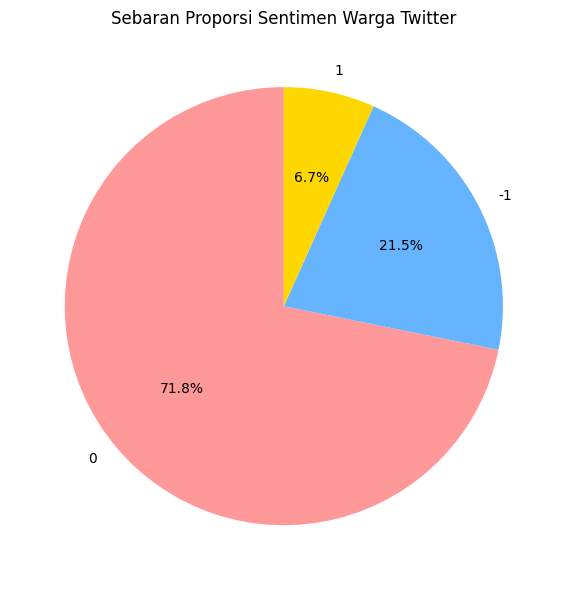

In [ ]:
# Membuat Pie Chart
proportions = df_pre['label'].value_counts(normalize=True)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
proportions.plot.pie(autopct = '%1.1f%%', startangle = 90, colors=['#ff9999', '#66b3ff', '#ffd700'])
plt.title('Sebaran Proporsi Sentimen Warga Twitter')
plt.ylabel('')

plt.tight_layout()
plt.show()

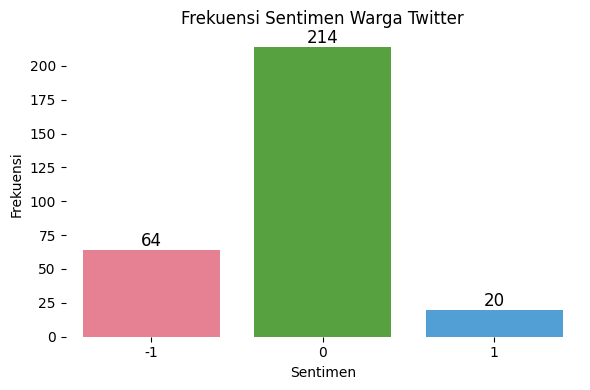

In [ ]:
# Menghitung frekuensi tweet untuk setiap sentimen
sentiment_counts = df_pre['label'].value_counts()

# Plotting
plt.figure(figsize=(6, 4))

# Membuat bar chart frekuensi jumlah tweet berdasarkan sentimen
palette = sns.color_palette("husl", len(sentiment_counts))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette = palette)
plt.title('Frekuensi Sentimen Warga Twitter', fontsize=12)
plt.xlabel('Sentimen', fontsize=10)
plt.ylabel('Frekuensi', fontsize=10)

# Menambahkan anotasi pada bar chart
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%d', fontsize=12, color='black')

# Menampilkan plot
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Dari hasil di atas, dapat diketahui bahwa terdapat perbedaan proporsi yang cukup besar antar label sentimen. Diperoleh sebanyak 64 atau sekitar 21,5% sentimen negatif, 214 atau sekitar 71,8% sentimen netral, dan 20 atau sekitar 6,7% sentimen positif.

# **4 - Visualisasi Data**

## **Word Clouds + Frequency**

In [ ]:
def plot_wordcloud_and_frequency(df, text_column, label_column, stopwords = sw_id, num_word = 10):
    labels = df[label_column].unique()
    num_cols = 2

    for label in labels:
        fig, axes = plt.subplots(1, num_cols, figsize=(12, 6))

        # Filter text by label
        text = " ".join(df[df[label_column] == label][text_column])

        # Generate wordcloud with a colormap
        wordcloud = WordCloud(width=400, height=400,
                              background_color='white',
                              stopwords=stopwords,
                              min_font_size=10,
                              colormap='viridis').generate(text)

        # Display wordcloud
        axes[0].imshow(wordcloud)
        axes[0].axis("off")
        axes[0].set_title(f'WordCloud - {label}')

        # Compute word frequency
        text_data = df[df[label_column] == label][text_column]
        word_frequency = text_data.str.split(expand=True).stack().value_counts()
        freq = word_frequency.head(num_word) # adjust numbers of word

        # Display word frequency bar plot with a color palette
        sns.barplot(x=freq.values, y=freq.index, ax=axes[1], palette="muted")
        axes[1].set_title(f'Word Frequency - {label}')
        axes[1].set_xlabel('Count')
        for p in axes[1].patches:
            axes[1].annotate("{:.0f}".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y() + .5), ha='left', va='center')

        plt.tight_layout()
        plt.show()

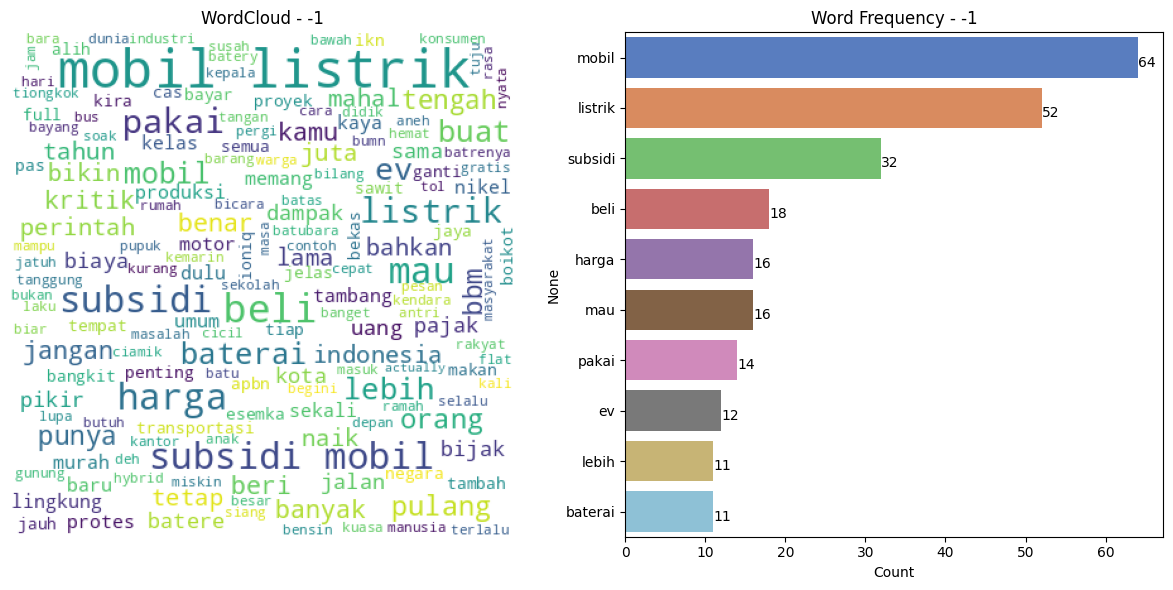

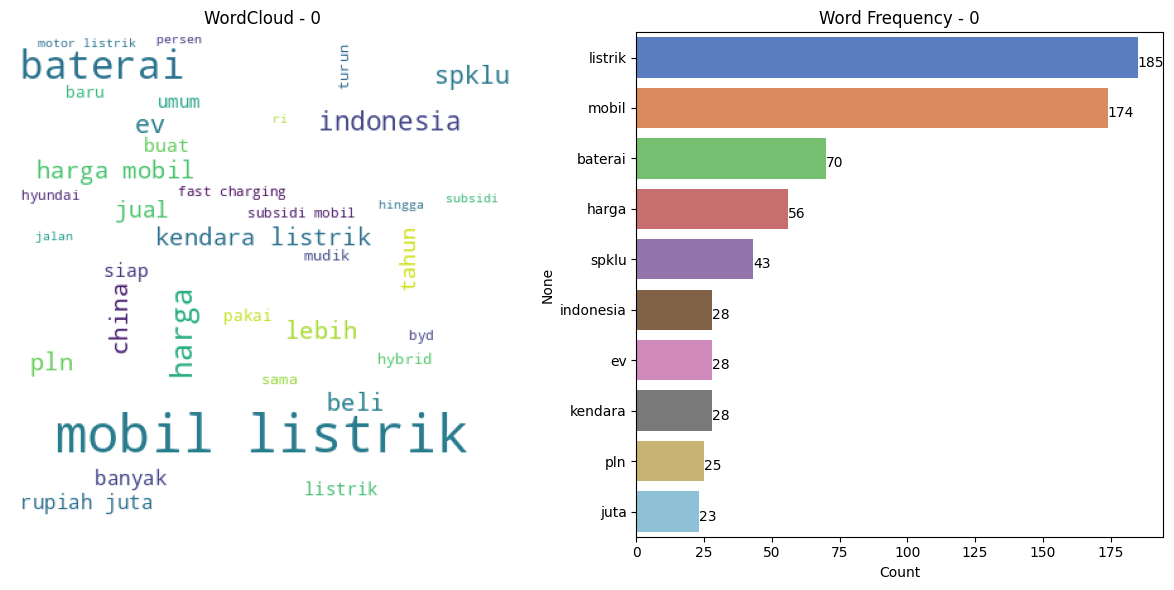

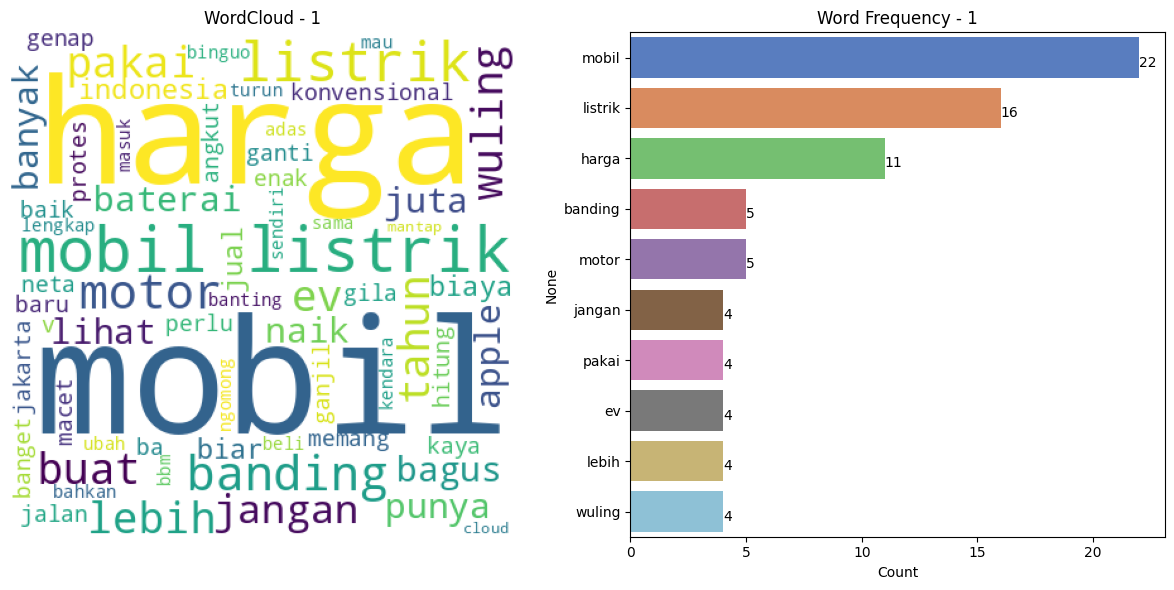

In [ ]:
plot_wordcloud_and_frequency(df_pre, 'full_text', 'label', sw_id, 10)

Dari hasil visualisasi word cloud di atas, dapat diketahui bahwa top 3 kata yang paling sering muncul pada sentimen negatif adalah mobil (64), listrik (52), dan subsidi (32). Top 3 kata yang paling sering muncul pada sentimen netral adalah listrik (185), mobil (174), dan baterai (70). Top 3 kata yang paling sering muncul pada sentimen positif adalah mobil (22), listrik (16), dan harga (11).

# **5 - Analisis Klasifikasi Sentimen**

### **Library**

In [13]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=d354127777e5e2ee8ac2ef58416f7c01cf96d0a02509cb1e8765523be32f68c7
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [14]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.2 MB/s eta 0:00:00


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('punkt')
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score
from catboost import CatBoostClassifier

#Lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from lime.lime_text import IndexedString,IndexedCharacters
from lime.lime_base import LimeBase
from lime.lime_text import explanation

kf = KFold(n_splits=5, random_state = 21725, shuffle = True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### **Load Data**

In [16]:
# Gunakan data yang telah di cleaning dan melewati tahap pre-processing
df_analisis = df_pre.copy()
df_test_analisis = df_test_pre.copy()
display(df_analisis.head(), df_test_analisis.head())

,full_text,label
0,misalnyasubsidi motor mobil listrik alih buat beli kira kira sungai tambah ciamik,-1
1,berita populer kumparanoto minggu estimasi harga mobil listrik hyundai kona dampak fitur fast charging mobil listrik,0
2,sehat baterai mobil listrik turun bawah persen ganti gratis vinfast,0
3,jelas pikir lah konsumen nama bekas batere rawan soak batere ude soak harga tengah harga beli,-1
4,perintah ri klaim baterai nikel lebih canggih buat mobil listrik,0


,full_text,label
0,spklu voltron luas jaring lewat kerja sama living world,positif
1,kompresor ac mobil listrik kerja ambil daya listrik baterai,netral
2,pt pln persero lalu anak usaha pln haleyora power gandeng tiga pihak bangun stasiun isi kendara listrik umum spklu baru indonesia,positif
3,mobil listrik potong harga rupiah juta pevs,positif
4,elon musk lah siapa kamu,negatif


In [17]:
#Mengubah label pada data test agar sama dengan data train
df_test_analisis['label'] = df_test_analisis['label'].replace(['positif','netral','negatif'], [1,0,-1])
df_test_analisis.head()

,full_text,label
0,spklu voltron luas jaring lewat kerja sama living world,1
1,kompresor ac mobil listrik kerja ambil daya listrik baterai,0
2,pt pln persero lalu anak usaha pln haleyora power gandeng tiga pihak bangun stasiun isi kendara listrik umum spklu baru indonesia,1
3,mobil listrik potong harga rupiah juta pevs,1
4,elon musk lah siapa kamu,-1


In [18]:
# Splitting Data train
X = df_analisis.copy()
y = X.pop('label')

X_train, X_test, y_train, y_test = train_test_split(X.full_text, y, test_size = 0.2, random_state = 21725, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 21725, stratify = y_train)

display(X_train.shape, X_test.shape, X_val.shape)

(190,)

(60,)

(48,)

In [31]:
#splitting data test
test_X = df_test_analisis['full_text']
test_y = df_test_analisis['label']

## **Modelling**

In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [21]:
# Single Model
def train_model(model, data, targets):
    # Create a Pipeline object with a TfidfVectorizer and the given model
    text_clf = ImbPipeline([('vect', TfidfVectorizer()),
                            ('smote', SMOTE(random_state = 5048)),
                         ('clf', model)])

    # Fit the model on the data and targets
    text_clf.fit(data, targets)
    return text_clf

# Model Comparison
def train_model_comparison(models, X_train, y_train, X_val, y_val):
    results = []
    for name, model in models.items():
        text_clf = train_model(model, X_train, y_train)

        # Compute cross-validated scores
        cv_scores = cross_val_score(text_clf, X_train, y_train, cv = kf)
        train_acc = cv_scores.mean()

        # Predict on the validation data
        val_pred = text_clf.predict(X_val)

        # Compute accuracy on validation data
        val_acc = accuracy_score(y_val, val_pred)

        results.append([name, train_acc, val_acc])

    # Create DataFrame for results
    df_results = pd.DataFrame(results, columns=['Model', 'Train Accuracy', 'Val Accuracy'])
    df_results_sorted = df_results.sort_values(by='Val Accuracy', ascending=False)

    return df_results_sorted

> #### **Baseline Model**

In [22]:
# Model Candidate
models = {
    'Random Forest': RandomForestClassifier(random_state = 21725),
    'Logistic Regression': LogisticRegression(random_state = 21725),
    'Decision Tree': DecisionTreeClassifier(random_state = 21725),
    'Linear SVM': LinearSVC(random_state = 21725),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Bernoulli Naive Bayes': BernoulliNB()
}

results = train_model_comparison(models, X_train, y_train, X_val, y_val)
print(results)

                     Model  Train Accuracy  Val Accuracy
1      Logistic Regression        0.736842      0.833333
3               Linear SVM        0.710526      0.812500
0            Random Forest        0.726316      0.770833
5    Bernoulli Naive Bayes        0.736842      0.750000
4  Multinomial Naive Bayes        0.621053      0.729167
2            Decision Tree        0.678947      0.666667


3 model terbaik pada data train adalah Logistic Regression, Linear SVM, dan Random Forest. Maka akan dilakukan optimalisasi pada algoritma SVM dan Random Forest menggunakan **hyperparameter tuning**


> #### Logistic Regression

In [23]:
# Membuat pipeline dengan TfidfVectorizer dan model logistic
logistic_model = ImbPipeline([('vect', TfidfVectorizer()),
                            ('smote', SMOTE(random_state = 5048)),
                         ('clf', LogisticRegression(random_state = 21725))])

# Daftar hyperparameter yang ingin dituning
param_grid = {
    'clf__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'clf__max_iter': [100, 200, 300],
    'clf__tol': [1e-4, 1e-3, 1e-2]
}

# Inisialisasi GridSearchCV dengan model, parameter grid, dan metrik evaluasi yang diinginkan
logistic_grid = GridSearchCV(logistic_model, param_grid, cv = kf, n_jobs = -1, verbose = 1, scoring = 'accuracy')

# Melatih GridSearchCV pada data train
logistic_grid.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best parameters found: ", logistic_grid.best_params_)

# Akurasi data train dan validasi
print("Train Accuracy: ", logistic_grid.best_score_)

logistic_best = logistic_grid.best_estimator_
y_pred = logistic_best.predict(X_val)
print("Val Accuracy: ", accuracy_score(y_val, y_pred))

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
Best parameters found:  {'clf__C': 0.01, 'clf__max_iter': 100, 'clf__penalty': 'none', 'clf__solver': 'lbfgs', 'clf__tol': 0.0001}
Train Accuracy:  0.7473684210526315
Val Accuracy:  0.8125


> #### Linear SVM

In [24]:
# Membuat pipeline dengan TfidfVectorizer dan model SVM
svm_model = ImbPipeline([('vect', TfidfVectorizer()),
                            ('smote', SMOTE(random_state = 5048)),
                         ('clf', LinearSVC(random_state = 21725))])

# Daftar hyperparameter yang ingin dituning
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2'],
    'clf__loss': ['hinge', 'squared_hinge'],
    'clf__max_iter': [1000, 2000, 3000],
    'clf__tol': [1e-4, 1e-3, 1e-2]
}

# Inisialisasi GridSearchCV dengan model, parameter grid, dan metrik evaluasi yang diinginkan
svm_grid = GridSearchCV(svm_model, param_grid, cv = kf, n_jobs = -1, verbose = 1, scoring = 'accuracy')

# Melatih GridSearchCV pada data train
svm_grid.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best parameters found: ", svm_grid.best_params_)

# Akurasi data train dan validasi
print("Train Accuracy: ", svm_grid.best_score_)

svm_best = svm_grid.best_estimator_
y_pred = svm_best.predict(X_val)
print("Val Accuracy: ", accuracy_score(y_val, y_pred))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters found:  {'clf__C': 0.1, 'clf__loss': 'squared_hinge', 'clf__max_iter': 1000, 'clf__penalty': 'l2', 'clf__tol': 0.0001}
Train Accuracy:  0.7421052631578948
Val Accuracy:  0.8333333333333334


> #### Random Forest

In [ ]:
# Membuat pipeline dengan TfidfVectorizer dan model Random Forest
rf_model = Pipeline([('vect', TfidfVectorizer()), ('clf', RandomForestClassifier(random_state = 42))])

# Daftar hyperparameter yang ingin dituning
param_grid = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20],
}

# Inisialisasi GridSearchCV dengan model, parameter grid, dan metrik evaluasi yang diinginkan
rf_grid = GridSearchCV(rf_model, param_grid, cv = kf, n_jobs = -1, verbose = 1, scoring = 'accuracy')

# Melatih GridSearchCV pada data train
rf_grid.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best parameters found: ", rf_grid.best_params_)

# Akurasi data train dan validasi
print("Train Accuracy: ", rf_grid.best_score_)

rf_best = rf_grid.best_estimator_
y_pred = rf_best.predict(X_val)
print("Val Accuracy: ", accuracy_score(y_val, y_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found:  {'clf__max_depth': None, 'clf__n_estimators': 100, 'vect__max_df': 0.5, 'vect__ngram_range': (1, 1)}
Train Accuracy:  0.7368421052631579
Val Accuracy:  0.7291666666666666


Dari hasil hyperparameter tunning, diperoleh performa terbaik pada model SVM. Akan tetapi, setelah dilakukan hyperparameter tunning pada model Logistic Regression justru malah mengalami penurunan akurasi. Oleh karena itu, pada pemilihan model terbaik, akan dicoba algoritma Logistic Regression tanpa hyperparameter tunning dan Linear SVM dengan hyperparameter tunning, kemudian dipilih model yang memiliki performa lebih baik.

### **Best Model**

> #### Performa Model

In [25]:
# Melakukan prediksi pada data test menggunakan model Logistic Regression tanpa hyperparameter tuning
model_best = ImbPipeline([('vect', TfidfVectorizer()),
                           ('smote', SMOTE(random_state = 5048)),
                         ('clf', LogisticRegression(random_state = 21725))])
model_best.fit(X_train, y_train)
y_pred = model_best.predict(X_test)

# Membuat laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          -1       0.69      0.85      0.76        13
           0       0.91      0.91      0.91        43
           1       0.00      0.00      0.00         4

    accuracy                           0.83        60
   macro avg       0.53      0.58      0.56        60
weighted avg       0.80      0.83      0.81        60



In [27]:
# Melakukan prediksi pada data test menggunakan model linear SVM dengan hyperparameter tunning
y_pred = svm_best.predict(X_test)

# Membuat laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          -1       0.59      0.77      0.67        13
           0       0.90      0.86      0.88        43
           1       0.00      0.00      0.00         4

    accuracy                           0.78        60
   macro avg       0.50      0.54      0.52        60
weighted avg       0.77      0.78      0.78        60



Diperoleh nilai F1 Score model Logistic Regression tanpa hyperparameter tunning lebih baik dibanding Linear SVM dengan hyperparameter tunning. Oleh karena itu, model yang akan digunakan adalah Logistic Regression tanpa hyperparameter tunning.

> #### **Performa Model terhadap Data Validasi**

In [36]:
# Melakukan prediksi pada data test menggunakan model Logistic Regression tanpa hyperparameter tuning
model_best = ImbPipeline([('vect', TfidfVectorizer()),
                           ('smote', SMOTE(random_state = 5048)),
                         ('clf', LogisticRegression(random_state = 21725))])
model_best.fit(X_train, y_train)
y_pred = model_best.predict(test_X)

# Membuat laporan klasifikasi
classification_rep = classification_report(test_y, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

          -1       0.50      0.33      0.40        15
           0       0.41      0.84      0.55        19
           1       0.00      0.00      0.00        16

    accuracy                           0.42        50
   macro avg       0.30      0.39      0.32        50
weighted avg       0.31      0.42      0.33        50



Diperoleh F1 Score pada data validasi sebesar 0,32 (macro avg) dan 0,33 (weighted avg).

# **6 - Kesimpulan**
Dari analisis sentimen twitter terhadap kebijakan mobil listrik yang telah dilakukan sebelumnya, diperoleh bahwa tweet masyarakat lebih banyak yang mengekspresiken sentimen netral dibanding sentimen positif atau negatif. Adapun jika dibandingkan antara tweet sentimen negatif dan tweet sentimen positif, tweet dengan sentimen negatif lebih banyak dibanding sentimen positif. Dari hasil visualisasi word cloud, beberapa topik yang sering diperbincangkan oleh masyarakat adalah mengenai kebijakan pemerintah tentang **subsidi** mobil listrik, **harga** mobil listrik, **baterai** mobil listrik, **spklu** yang ditambah oleh pemerintah, dan beberapa jenis atau merek mobil listrik.